# Loss function

The **loss function** measures a models prediction error, more specifically it calculates the difference between the model prediction and the true label. 

The loss function is also called error function or cost function. 

The loss functions is useful because:
 * It provides a measure for model performance
 * It helps to monitor the training progress, if the loss does not change any more the model has stopped learning
 * It helps to compare different versions of a model
 * The gradient of the loss function informs the optimizer how to update model parameters to reduce the prediction error.
 
When we talk about "training the model" or optimization we actually mean minimizing the loss function.

Let $J(y, \hat y)$ be the loss function for a single example $x$, with the true label $y$ and the prediction $\hat y$.

The value of $J(y, \hat y)$ is a positive scalar, a value of 0 would indicate a model that hat no predicton error.

The loss of a set of examples $x = [x_1,...,x_n]$ is the average of the individual losses:

$$
J = \frac{1}{N}\sum_{i=1}^N J(y_i, \hat y_i)
$$

Note that the loss does not have a unit, it is just a number.

There are many different loss functions available, the choice depends on the type of prediction problem. 

The **cross entropy function** is a common choice for classification problems.

Popular loss functions for regression problems are **mean squared error** or **mean average error**.

## Cross-entropy loss

The **cross-entropy loss** (also referred to as *negative log likelihood*) is used when a model outputs a probability distribution.

Let $y = [y_1,...,y_n]$ be a vector representing the true multinomial distribution and let $ \hat y = [\hat y_1,..., \hat y_n]$ be the networks output which was transformed by the *softmax* function. 

$\hat y$ represents the class  conditional distribution $\hat y_i = P(y=i \mid x)$. 

The cross entropy loss measures the dissimilarity between the true label distribution $y$ and the predicted label distribution $ \hat y$:

$$
L(\hat y, y) = - y \cdot log(\hat y) = - \sum_{i=1}^n y_i \ log(\hat y_i)
$$

Note that $\cdot$ is the dot product.

We only handle *hard classification problems* in which each training example has a single true class assignment. In this case $y$ is a one-hot vector. 

For example if there are 5 classes and the true label is 2 than $ y = [0, 1, 0, 0, 0]$.

The cross-entropy can be simplified to:

$$
L(\hat y, y) = - log(\hat y_t)
$$

where t is the true label.

Because the scores $\hat y$ have been transformed using the *softmax* function and represent a conditional probability distribution, increasing the probability of the correct class means decreasing the mass assigned to all the other classes.

The cross entropy loss depends only on the probability of the correct class. The loss is independent of how the remaining probability is split between incorrect classes.

**Note 1:** The input to a cross-entropy loss must be a probability distribution. It can not be used with unnormalized scores: the log is not defined for negative numbers and for scores > 1 the loss becomes negative.

**Note 2:** The combination of softmax function and cross entropy loss is somestimes called *softmax loss*.


Lets look at a Python example how cross-entropy loss is calculated:

In [13]:
import numpy as np

def cross_entropy(y_hat, y):
    return -np.dot(y, np.log(y_hat))

y_hat = np.array([0.7, 0.2, 0.1])

print('y_hat = %s' % y_hat)
print()
for i in range(y_hat.shape[0]):
    y = np.zeros(y_hat.shape[0])
    y[i] = 1
    print('true_label = %i AND P(y=%d|x) = %.2f' % (i, i, y_hat[i]))
    print('cross entropy loss = %.4f' % cross_entropy(y_hat, y))
    print()

y_hat = [0.7 0.2 0.1]

true_label = 0 AND P(y=0|x) = 0.70
cross entropy loss = 0.3567

true_label = 1 AND P(y=1|x) = 0.20
cross entropy loss = 1.6094

true_label = 2 AND P(y=2|x) = 0.10
cross entropy loss = 2.3026



Lets looks how the cross-entropy loss looks like:

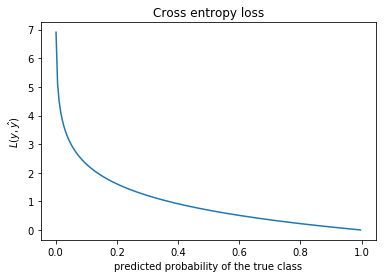

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.001, 1.0, 0.005)
y = -np.log(x)
plt.plot(x,y)
plt.title('Cross entropy loss')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('predicted probability of the true class')
plt.show()

We can see from the plot that the cross-entropy loss behaves as expected. When the predicted probability of the true class goes to 1 the loss goes to 0. When the predicted probability of the true class goes to 0, the loss goes to infinity.


So far we have looked at cross-entropy loss for a multi-class classification problem.

Now lets look how cross-entropy loss is calculated for a **binary classification** problem.

In this case the network ouput is transformed by a **sigmoid function**. 

The true label $y \in [0,1]$ and $\hat y = p(y=1 \mid x)$ are scalars.


 

In this case the cross entropy is calculated like this:

$$
L(\hat y, y) = -y \ log(\hat y) + (1-y) \ log(1-\hat y)
$$

Notice that the terms $-y$ and $(1-y)$ are **indicator functions** and one always evaluates to 1 and the other evaluates to 0.

## Mean Square Error (MSE)

Mean Square Error (MSE) is commonly used as loss function for regression problems. 

Keep in mind that for regression problems that true and predicted labels are simply scalars and not probabilities.

MSE is the sum of squared distances between the target values and predicted values.

$$
MSE = \frac{1}{N} \sum_i^N(y_i - \hat y_i)^2
$$

MSE is also called L2 loss.


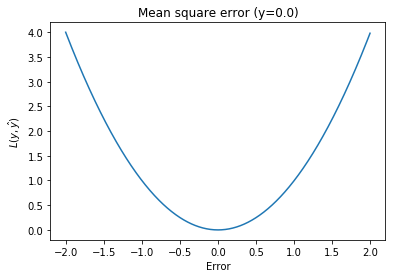

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0, 2.0, 0.005)
y = x**2
plt.plot(x,y)
plt.title('Mean square error (y=0.0)')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()

The nice thing about MSE is that during optimization the parameter updates are getting smaller as we are getting nearer to the minimum. 

The problem is that the loss function is sensitive to outlier examples because of the squared term.

## Mean absolute error (MAE)

Mean Absolute Error (MAE) is another loss function used for regression problems. 

MAE is the sum of absolute differences between the target values and predicted values.

$$
MAE = \frac{1}{N} \sum_i^N \mid y_i - \hat y_i \mid
$$

MAE is also called L1 loss.


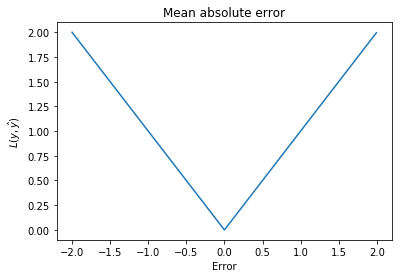

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0, 2.0, 0.005)
y = abs(x)
plt.plot(x,y)
plt.title('Mean absolute error')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()